In [8]:
from lib import load_karate
import networkx as nx
from lib.basic_graph_matrix import Graph_Matrix # our simple implementation
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [77]:
import heapq


class nodeInfo:
	def __init__(self, sat, deg, vertex):
		self.sat = sat
		self.deg = deg
		self.vertex = vertex


class maxSat:
	def __call__(self, node):
		return (-node.sat, -node.deg, node.vertex)


class Graph:
	def __init__(self, numNodes):
		self.n = numNodes
		self.adj = [[] for i in range(numNodes)]

	def addEdge(self, u, v):
		self.adj[u].append(v)
		self.adj[v].append(u)

	def DSatur(self):
		used = [False] * self.n
		c = [-1] * self.n
		d = [len(self.adj[u]) for u in range(self.n)]
		adjCols = [set() for u in range(self.n)]
		Q = []

		for u in range(self.n):
			heapq.heappush(Q, (maxSat()(nodeInfo(0, d[u], u)), u))

		while Q:
			maxPtr, u = heapq.heappop(Q)
			while Q and maxPtr == Q[0][0]:
				_, v = heapq.heappop(Q)
				heapq.heappush(
					Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))

			for v in self.adj[u]:
				if c[v] != -1:
					used[c[v]] = True
			for i in range(self.n):
				if not used[i]:
					break
			for v in self.adj[u]:
				if c[v] != -1:
					used[c[v]] = False
			c[u] = i
			for v in self.adj[u]:
				if c[v] == -1:
					heapq.heappush(
						Q, (maxSat()(nodeInfo(len(adjCols[v]), d[v], v)), v))
					adjCols[v].add(i)
					d[v] -= 1

		color_stack = {}
		for u in range(self.n):
			print(f"Vertex {u} ---> Color {c[u]}")
			if c[u] not in color_stack:
				color_stack[c[u]] = [u]
			else:
				color_stack[c[u]].append(u)
		return color_stack

In [78]:
G = Graph(5)
G.addEdge(0, 1)
G.addEdge(0, 2)
G.addEdge(1, 2)
G.addEdge(1, 3)
G.addEdge(2, 3)
G.addEdge(3, 4)

color_stack = G.DSatur()
print(color_stack)

Vertex 0 ---> Color 2
Vertex 1 ---> Color 0
Vertex 2 ---> Color 1
Vertex 3 ---> Color 2
Vertex 4 ---> Color 0
{2: [0, 3], 0: [1, 4], 1: [2]}


In [38]:
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}

Vertex 0 ---> Color green
Vertex 3 ---> Color green
Vertex 1 ---> Color red
Vertex 4 ---> Color red
Vertex 2 ---> Color blue


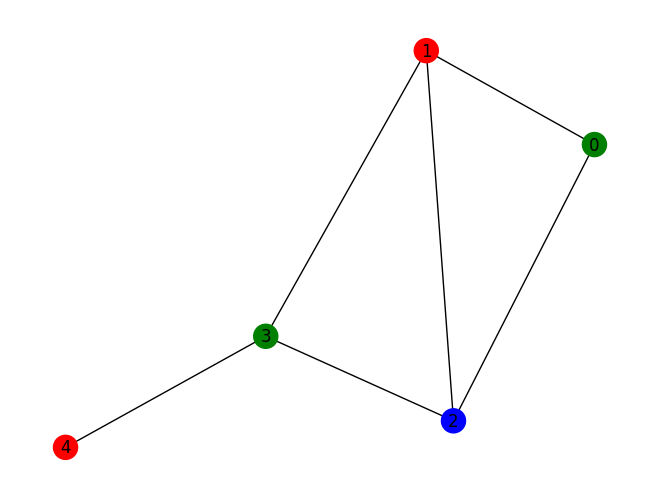

In [100]:
import networkx as nx
G = nx.Graph()

for color in color_stack:
    for vertex in color_stack[color]:
        clr = str(color_dict[color])
        print(f"Vertex {vertex} ---> Color {clr}")
        G.add_node(vertex, color=clr)

G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[G.nodes[n]['color'] for n in G.nodes])

plt.show()